In [36]:
from sklearn import datasets
from pandas import DataFrame
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [37]:
#查看数据特征
x_data = datasets.load_iris().data  # .data返回iris数据集所有输入特征
y_data = datasets.load_iris().target  # .target返回iris数据集所有标签
print("x_data from datasets: \n", x_data)
print("y_data from datasets: \n", y_data)

x_data = DataFrame(x_data, columns=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度']) # 为表格增加行索引（左侧）和列标签（上方）
pd.set_option('display.unicode.east_asian_width', True)  # 设置列名对齐
print("x_data add index: \n", x_data)

x_data['类别'] = y_data  # 新加一列，列标签为‘类别’，数据为y_data
print("x_data add a column: \n", x_data)

x_data from datasets: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3

In [38]:
# 数据集一部分做训练 一部分做测试
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target
x_train = x_data[:-30] # 
# print(x_train.shape) (120, 4)
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)
#print(y_test.shape) (30,)

# 把输入和标签对应起来
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32) #Combines consecutive elements of this dataset into batches.
# train_db 一共有120 / 32 = 4个batch（最后一个不足数）
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
print(train_db)
print(test_db)

for item in train_db:
    print(item)
# help(tf.data.Dataset.batch)

<BatchDataset shapes: ((None, 4), (None,)), types: (tf.float32, tf.int32)>
<BatchDataset shapes: ((None, 4), (None,)), types: (tf.float32, tf.int32)>
(<tf.Tensor: id=1002435, shape=(32, 4), dtype=float32, numpy=
array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
     

In [39]:
for x_test, y_test in test_db:
    print(x_test)
    print(y_test)

tf.Tensor(
[[6.9 3.2 5.7 2.3]
 [5.6 2.8 4.9 2. ]
 [7.7 2.8 6.7 2. ]
 [6.3 2.7 4.9 1.8]
 [6.7 3.3 5.7 2.1]
 [7.2 3.2 6.  1.8]
 [6.2 2.8 4.8 1.8]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.1]
 [7.2 3.  5.8 1.6]
 [7.4 2.8 6.1 1.9]
 [7.9 3.8 6.4 2. ]
 [6.4 2.8 5.6 2.2]
 [6.3 2.8 5.1 1.5]
 [6.1 2.6 5.6 1.4]
 [7.7 3.  6.1 2.3]
 [6.3 3.4 5.6 2.4]
 [6.4 3.1 5.5 1.8]
 [6.  3.  4.8 1.8]
 [6.9 3.1 5.4 2.1]
 [6.7 3.1 5.6 2.4]
 [6.9 3.1 5.1 2.3]
 [5.8 2.7 5.1 1.9]
 [6.8 3.2 5.9 2.3]
 [6.7 3.3 5.7 2.5]
 [6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]], shape=(30, 4), dtype=float32)
tf.Tensor([2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(30,), dtype=int32)


In [45]:
#神经网络的参数wTx + b 
#4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
#用tf.Variable()标记参数可训练
w1 = tf.Variable(tf.random.truncated_normal([4, 5], stddev=0.1))
b1 = tf.Variable(tf.random.truncated_normal([5], stddev=0.1))
w2 = tf.Variable(tf.random.truncated_normal([5,3],  stddev=0.1))
b2 = tf.Variable(tf.random.truncated_normal([3],  stddev=0.1))


lr = 0.02  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 5000  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练部分
for epoch in range(epoch):  #数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  #batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.matmul(y, w2) + b2
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        w1_grad, b1_grad = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * w1_grad)  # 参数w1自更新
        b1.assign_sub(lr * b1_grad)  # 参数b自更新

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.matmul(y, w2) + b2
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")

Epoch 0, loss: 0.21974936872720718
Test_acc: 0.0
--------------------------
Epoch 1, loss: 0.2192978449165821
Test_acc: 0.0
--------------------------
Epoch 2, loss: 0.21886298432946205
Test_acc: 0.0
--------------------------
Epoch 3, loss: 0.21844425052404404
Test_acc: 0.0
--------------------------
Epoch 4, loss: 0.21804113313555717
Test_acc: 0.0
--------------------------
Epoch 5, loss: 0.2176530584692955
Test_acc: 0.0
--------------------------
Epoch 6, loss: 0.21727950870990753
Test_acc: 0.0
--------------------------
Epoch 7, loss: 0.2169199250638485
Test_acc: 0.0
--------------------------
Epoch 8, loss: 0.21657375246286392
Test_acc: 0.0
--------------------------
Epoch 9, loss: 0.21624047309160233
Test_acc: 0.0
--------------------------
Epoch 10, loss: 0.21591951325535774
Test_acc: 0.0
--------------------------
Epoch 11, loss: 0.21561037003993988
Test_acc: 0.0
--------------------------
Epoch 12, loss: 0.21531252562999725
Test_acc: 0.0
--------------------------
Epoch 13, lo

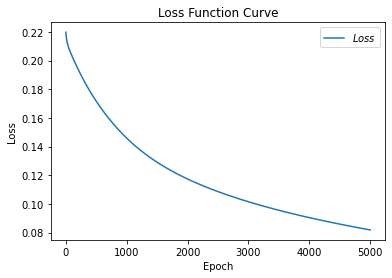

In [46]:
# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

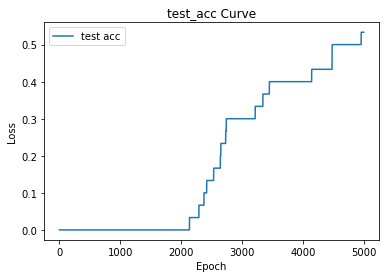

In [47]:
# 绘制 test_acc 曲线
plt.title('test_acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(test_acc, label="test acc")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像
#原因可能是学习率在后期显得比较大，应该采用衰减

# 总结
- 数据的读取
- 训练集和测试集的划分
- 数据类型的一致方便tf运算
- 数据+标签的组合 tf.data.Dataset.from_tensor_slices
- batch划分
- 训练参数  学习率 epochs
- 训练和测试
- 数据可视化